In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

## Linear Regression

In [3]:
df=pd.read_csv("canada_per_capita_income.csv")
df.head(5)
print(df.columns)

Index(['year', 'per capita income (US$)'], dtype='object')


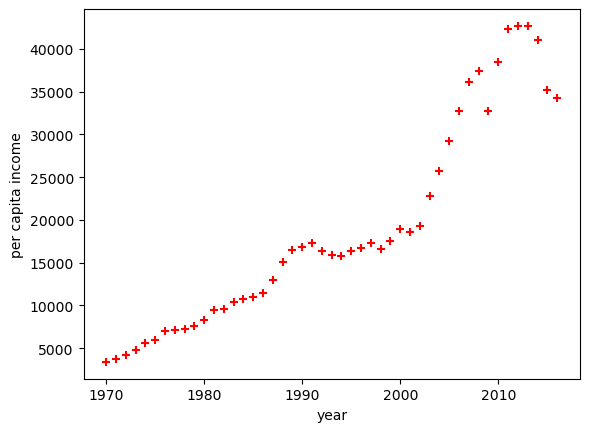

In [4]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income')
plt.scatter(df.year,df['per capita income (US$)'],color='red',marker='+')#always enter exact columns name 

In [68]:
reg = linear_model.LinearRegression()
reg.fit(df[['year']],df[['per capita income (US$)']])

LinearRegression()

In [22]:
prediction=reg.predict(np.array([[2010]]))
prediction

C:\Users\vasud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[33004.04334219]])

In [24]:
reg.coef_

array([[828.46507522]])

In [26]:
reg.intercept_

array([-1632210.75785546])

In [28]:
#y=m*x+c
828.465*2010+(-1632210.757)

33003.89300000016

In [30]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
path='C:\\Users\\vasud\\OneDrive\\DS & ML\\years.xlsx'
d=pd.read_excel(path,engine='openpyxl')
d.head(5)

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [32]:
p=reg.predict(d)

In [36]:
d['prices']=p

In [38]:
d.to_excel('predictions.xlsx',index=False)

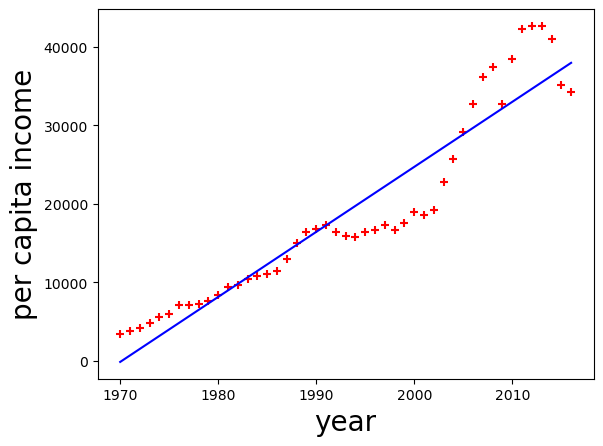

In [40]:
%matplotlib inline
plt.xlabel('year',fontsize=20)
plt.ylabel('per capita income',fontsize=20)
plt.scatter(df.year,df[['per capita income (US$)']],color='red',marker='+')
plt.plot(df.year,reg.predict(df[['year']]),color='blue')

In [42]:
reg.predict(np.array([[2020]]))

C:\Users\vasud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[41288.69409442]])

## Save Model using Joblib and Pickle

`Pickle`

    Pickle is a powerful standard library in Python used for serializing and deserializing objects. In machine learning (ML), Pickle is commonly used to save trained models and reuse them later without having to retrain them. This is particularly useful for deploying models or sharing them with others.

How Pickle Works in Machine Learning
1. Serializing (Saving) a Model
When you serialize a model, you convert it into a byte stream, which can then be saved to a file. This allows you to save the exact state of your model.

2. Deserializing (Loading) a Model
When you deserialize a model, you convert the byte stream back into a Python object. This lets you load the saved model and use it to make predictions or further train it.



In [74]:
import pickle

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
with open('model_pickle','wb') as f: #wb:w stand for write and b for binary mode
    pickle.dump(model,f)

In [78]:
with open('model_pickle','rb') as f: # rb:same as read(r) b: binary
    mp = pickle.load(f)

In [84]:
reg.predict(np.array([[2010]]))

C:\Users\vasud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[33004.04334219]])

 `Joblib`

In [107]:
import joblib



In [121]:
joblib.dump(model,'model_joblib') 
print("Model saved successfully")
#it crates a file in the current working directory and store the model and when we call it works


Model saved successfully


In [125]:
mj = joblib.load('model_joblib')


In [129]:
mj.predict(np.array([[2010]]))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Linear Regression Multiple Variables

    

In [10]:
df=pd.read_csv('hiring.csv')
df
print(df.columns)
print(df)

Index(['experience', 'test_score(out of 10)', 'interview_score(out of 10)',
       'salary($)'],
      dtype='object')
  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000


In [12]:
df.experience=df.experience.fillna('Zero')
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,Zero,8.0,9,50000
1,Zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [34]:
df.experience=df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [36]:
!pip install word2number

from word2number import w2n



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import math
mean_test_score=math.floor(df['test_score(out of 10)'].mean())
mean_test_score

7

In [38]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(mean_test_score)
df['test_score(out of 10)']

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     7.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [50]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [52]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [56]:
reg.intercept_

14992.651446693126

In [58]:
reg.predict([[2,9,6]])

C:\Users\vasud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53713.86677124])

In [60]:
 #y=m1*expericence+m2*test_score(out of 10)+m3*test_score(out of 10)+intercept (m1,m2,m2 are coeff values)

2922.26901502*2+2221.30909959*9+2147.48256637*6+14992.651446693126

53713.86677126313

In [64]:
reg.predict([[12,10,10]])

C:\Users\vasud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93747.79628651])

## Polynomial Linear Regression 

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
data = pd.read_csv("Position_Salaries.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Position_Salaries.csv'

## Gradient Descent Algorithm(Cost function)

    --> Gradient Descent is an optimization algorithm used to minimize the cost function in machine learning models. It's particularly useful in linear regression for finding the best-fitting line through the data points. The goal is to adjust the parameters (weights) of your model to minimize the error between the predicted values and the actual values.

**Cost Function:**

This measures the error or difference between the predicted values and the actual values. In linear regression, the cost function is typically the Mean Squared Error (MSE): $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 $$

Here, 
𝑚
 is the number of training examples, 
𝑦
^
𝑖
 is the predicted value, and 
𝑦
𝑖
 is the actual value.

In [45]:
# def gradient_descent(x,y):
#     m_curr = b_curr = 0
#     iterations = 100
#     n= len(x)
#     learning_rate = 0.001
    
#     for i in range(iterations):
#         y_predicted = m_curr * x + b_curr
#         cost = (1/n)* sum([val**2 for val in (y-y_predicted)])
#         md = -(2/n)*sum(x*(y-y_predicted))
#         bd = -(2/n)*sum((y-y_predicted))
#         m_curr = m_curr - learning_rate * md
#         b_curr = b_curr - learning_rate * bd
#         print("m {}, b {}, cost{}, iteration".format(m_curr,b_curr,cost,i))


# x = np.array([1,2,3,4,5])
# y = np.array([5,7,9,11,13])

# gradient_descent(x,y)

import numpy as np

def gradient_descent(x, y):
    m_curr = b_curr = 0  # Initialize parameters
    iterations = 100  # Number of iterations
    n = len(x)  # Number of data points
    learning_rate = 0.01  # Learning rate
     #m_curr is slope and b_curr is intercept
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr  # Predicted values(y=mx+c)
        cost = (1/(2*n)) * sum([val**2 for val in (y - y_predicted)])  # Cost function
        # 1/2 is used to simplification easily
        md = -(2/n) * sum(x * (y - y_predicted))  # Gradient for m(m derivation)
        bd = -(2/n) * sum(y - y_predicted)  # Gradient for b(b derivation)
        m_curr = m_curr - learning_rate * md  # Update m
        b_curr = b_curr - learning_rate * bd  # Update b
        print(f"m: {m_curr}, b: {b_curr}, cost: {cost}, iteration: {i}")

x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

gradient_descent(x, y)


m: 0.62, b: 0.18, cost: 44.5, iteration: 0
m: 1.0928, b: 0.3192, cost: 26.125199999999996, iteration: 1
m: 1.453232, b: 0.42724799999999996, cost: 15.415974720000001, iteration: 2
m: 1.7278860800000002, b: 0.5115091199999999, cost: 9.173875675392, iteration: 3
m: 1.9370605952000002, b: 0.5776057727999999, cost: 5.535005374662449, iteration: 4
m: 2.096250917888, b: 0.6298300216319999, cost: 3.413176576259893, iteration: 5
m: 2.2172859146547204, b: 0.6714583661260799, cost: 2.1754130708415325, iteration: 6
m: 2.309195511463117, b: 0.7049920439242751, cost: 1.4528476020487988, iteration: 7
m: 2.3788729763057748, b: 0.7323404723580026, cost: 1.0305225365523307, iteration: 8
m: 2.431580493177024, b: 0.7549612843324961, cost: 0.7831711501565299, iteration: 9
m: 2.471335107618129, b: 0.7739672290552247, cost: 0.6377941405951941, iteration: 10
m: 2.501203350198827, b: 0.7902077780170325, cost: 0.5518510718994876, iteration: 11
m: 2.523526146474063, b: 0.8043314214447622, cost: 0.50055142784259

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

m: 0.062, b: 0.018000000000000002, cost: 44.5, iteration: 0
m: 0.122528, b: 0.035592000000000006, cost: 42.440652, iteration: 1
m: 0.181618832, b: 0.052785648000000004, cost: 40.477592554272, iteration: 2
m: 0.239306503808, b: 0.069590363712, cost: 38.60631884227951, iteration: 3
m: 0.29562421854195203, b: 0.086015343961728, cost: 36.82253861302717, iteration: 4
m: 0.35060439367025875, b: 0.10206956796255283, cost: 35.12216033800325, iteration: 5
m: 0.40427867960173774, b: 0.11776180246460617, cost: 33.50128382460902, iteration: 6
m: 0.4566779778357119, b: 0.13310060678206653, cost: 31.956191268541147, iteration: 7
m: 0.5078324586826338, b: 0.14809433770148814, cost: 30.483338724599662, iteration: 8
m: 0.5577715785654069, b: 0.16275115427398937, cost: 29.079347976354416, iteration: 9
m: 0.606524096911324, b: 0.17707902249404894, cost: 27.740998786017883, iteration: 10
m: 0.6541180926443106, b: 0.1910857198675929, cost: 26.4652215067442, iteration: 11
m: 0.7005809802869303, b: 0.2047788

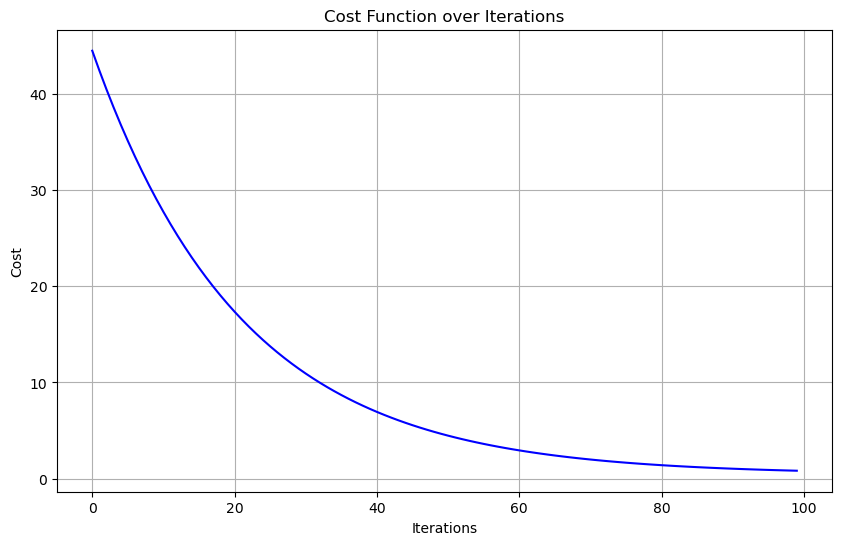

In [52]:
import numpy as np
import math

def gradient_descent(x, y, learning_rate=0.001, iterations=100, tol=1e-09):
    m_curr = b_curr = 0  # Initialize parameters
    n = len(x)  # Number of data points
    previous_cost = float('inf')  # Initialize previous cost to infinity
    cost_history = []  # To store the cost values
    
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr  # Predicted values
        current_cost = (1 / (2 * n)) * sum([val**2 for val in (y - y_predicted)])  # Traditional MSE Cost function
        md = -(2 / n) * sum(x * (y - y_predicted))  # Gradient for m
        bd = -(2 / n) * sum(y - y_predicted)  # Gradient for b
        m_curr = m_curr - learning_rate * md  # Update m
        b_curr = b_curr - learning_rate * bd  # Update b
        
        # Check for convergence
        if math.isclose(current_cost, previous_cost, rel_tol=tol):
            print(f"Converged after {i} iterations")
            break

        previous_cost = current_cost  # Update previous cost
        cost_history.append(current_cost)  # Store the cost value

        print(f"m: {m_curr}, b: {b_curr}, cost: {current_cost}, iteration: {i}")

    return m_curr, b_curr, cost_history

# Generate sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

# Perform gradient descent
m, b, cost_history = gradient_descent(x, y)

# Plotting the cost function
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.title("Cost Function over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


In [66]:
import pandas as pd

def gradient_descent(x,y):
    m_curr=b_curr=0
    iterations = 100
    learning_rate=0.001
    n=len(x) # n is leng of data points
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/(2*n))*sum([val**2 for val in(y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd= -(2/n) * sum(y-y_predicted)
        m_curr=m_curr-learning_rate * md
        b_curr = b_curr-learning_rate * bd
        print("m: {}, b: {}, cost: {}, iteration: {}".format(m_curr,b_curr,cost, i))
        


x=pd.array([92,56,88,70,80,49,65,35,66,67])
y=pd.array([98,68,81,80,83,52,66,30,68,73])

gradient_descent(x,y)

m: 9.891800000000002, b: 0.1398, cost: 2599.55, iteration: 0
m: -73.89063968000005, b: -1.0422240800000002, cost: 185363.8331282521, iteration: 1
m: 635.7369779473285, b: 8.971449829408007, cost: 13296682.60641711, iteration: 2
m: -5374.727514955187, b: -75.84115332401389, cost: 953888996.4361283, iteration: 3
m: 45533.21677472461, b: 642.5139249806472, cost: 68430999127.90207, iteration: 4
m: -385651.2277087454, b: -5441.869063972523, cost: 4909168399112.858, iteration: 5
m: 3266431.5217446033, b: 46092.15849604381, cost: 352178613251730.1, iteration: 6
m: -27666290.14670837, b: -390395.13732602727, cost: 2.5264925858871764e+16, iteration: 7
m: 234330311.64447328, b: 3306602.156348863, cost: 1.8124793915241503e+18, iteration: 8
m: -1984750831.161688, b: -28006540.543865472, cost: 1.3002537838622638e+20, iteration: 9
m: 16810611721.985636, b: 237212183.72022378, cost: 9.327884831983796e+21, iteration: 10
m: -142383951599.6276, b: -2009159966.5646977, cost: 6.691727147318981e+23, iterat

## Dummy Variables & One Hot Encoding

In [2]:
import pandas as pd
df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [14]:
dummies=pd.get_dummies(df['town'])
dummies = dummies.astype(int)
dummies


,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [18]:
merged = pd.concat([df,dummies], axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [38]:
final = merged.drop(['town','west windsor'],axis = 'columns')
final

# to avoid multicollinearity in dummy variable we need to drop one dummy varibale to cloumn
#Even thought if not drop dummy varible it "works well" becoz Linear regression know about it

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
x = final.drop('price', axis='columns')
x #(x is dependent variable )

# why bcoz price is independent nd remaining are dependent on price

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [44]:
y = final.price
y #independent

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [46]:
model.fit(x,y)

LinearRegression()

In [48]:
model.predict([[2800,0,1]]) # area,0 & 1 are where i want to check (robinsville)
# 1 indicates checking west windsor

C:\Users\vasud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [50]:
model.predict([[3400,0,0]]) # here i check in west windsor where in my 0,0 indicate i not checking monroe township and robinsville

C:\Users\vasud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [52]:
model.score(x,y) #it deinfes how accurate ur model calculate the predicated values and compare with actual values 
#which is y   0.95 means 95% accurate my model where as 1 indicates perfect

0.9573929037221873

## OneHotEncoding Using sklearn

In [54]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
dfle = df
dfle.town = le.fit_transform(dfle.town) #it takes label columns as an input and it is town
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [103]:
x = dfle[['town','area']].values #x is training dataset and y is dependent variable
x # why take values is to get 2d array not dataFrame

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [122]:
y = dfle.price.values
y


array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

In [162]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town',OneHotEncoder(),[0])], remainder = 'passthrough')

In [164]:
x= ct.fit_transform(x)


ValueError: all features must be in [0, -1] or [-0, 0]